# Module 4 Unit 2
## Fitting neural networks in Python

### Classification problem

In [26]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Now that the required libraries have been imported, it is time to import and clean the data.

In [27]:
# Import data
df = pd.read_csv('WISDM_transformed.csv', delimiter = ",")

# Drop missing entries
df = df.replace("?", np.nan)
print("Number of null values in the data set = %s" % df.isnull().sum().sum())
df = df.dropna()

Number of null values in the data set = 615


In [28]:
# Explore the size of the data set
df.shape

(4944, 47)

In [29]:
# Explore type of data and feature names
# You can use df.head() or df.tail() to see the first or last few records, respectively.
# However, if data is sorted, it is better to view some randomly sampled records
df.sample(10, random_state=0)

,id,UNIQUE_ID,user,X0,X1,X2,X3,X4,X5,X6,...,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,RESULTANT,class
3992,3993,432,31,0.13,0.10,0.10,0.11,0.08,0.10,0.11,...,417.39,685.71,7.17,7.59,3.35,10.06,8.62,10.06,12.75,Jogging
3635,3636,75,34,0.13,0.12,0.10,0.08,0.08,0.08,0.08,...,696.15,1800,4.91,5.00,3.79,5.92,6.02,5.92,12.71,Walking
1160,1161,498,36,0.03,0.06,0.12,0.15,0.12,0.14,0.18,...,2800,3183.33,3.38,3.83,2.71,4.32,4.73,4.32,10.94,Jogging
4023,4024,463,31,0.13,0.11,0.10,0.13,0.08,0.11,0.12,...,745.83,2583.33,2.32,3.79,2.96,2.90,4.54,2.90,10.99,Walking
1125,1126,463,36,0.12,0.07,0.08,0.11,0.08,0.13,0.11,...,1912.5,1362.5,2.06,3.02,2.38,2.51,3.60,2.51,10.72,Walking
2254,2255,418,28,0.02,0.10,0.08,0.10,0.10,0.09,0.09,...,1358.33,1637.5,1.90,2.36,1.44,2.32,2.94,2.32,10.27,Downstairs
4926,4927,408,2,0.10,0.10,0.11,0.09,0.07,0.11,0.11,...,3350,1610,7.69,3.38,4.48,10.26,4.29,10.26,10.51,Jogging
4044,4045,484,31,0.02,0.13,0.13,0.12,0.12,0.12,0.07,...,571.88,2666.67,8.08,6.68,3.44,10.99,7.88,10.99,12.09,Jogging
204,205,205,20,0.08,0.09,0.14,0.10,0.09,0.11,0.13,...,2916.67,2533.33,4.62,2.92,1.96,5.36,3.66,5.36,10.54,Downstairs
4816,4817,298,9,0.02,0.09,0.06,0.10,0.08,0.09,0.08,...,820,1525,1.31,2.58,2.07,1.94,3.61,1.94,9.07,Walking


In [30]:
# Display all the unique values in the class column
print(df['class'].unique())

['Jogging' 'Walking' 'Upstairs' 'Downstairs' 'Sitting' 'Standing']


For the features, choose all the columns except the `id`, `UNIQUE_ID`,`user`, and `class` variables. The `class` variable will be the response variable.

In [31]:
# Split data into features (X) and response (y)
X = df.iloc[:, 3:46] 
y = df.loc[:,["class"]]

In [32]:
# Change the array shape of the output from a dataframe single column vector
# to a contiguous flattened array
y = np.ravel(y)

In [33]:
# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Note that the features have widely varying dimensions: X0 is a proportion between 0 and 1;
YPeak can be in the thousands and ZSTANDDEV is a standard deviation. 
Since neural networks are much more sensitive to features with high (absolute) values,
you should scale all your input data to have a mean of 0 and standard deviation of 1.

In [34]:
# Scale the data
scaler = StandardScaler()  

# Remember to fit using only the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# Apply the same transformation to test data
X_test = scaler.transform(X_test)

Next, you fit a two-layer MLP classifier with 5 nodes on each layer.

In [35]:
reg = MLPClassifier(max_iter=2000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
    
# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

0.7928802588996764

Can you get a better accuracy? More nodes on each layer could lead to overfitting.
Fewer nodes could make the model too sparse. 
Use cross-validation to find the optimal number of nodes per layer.

In [36]:
# Fit and check accuracy for various numbers of nodes on both layers
# Note this will take some time
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,7) for j in range(3,7)]:

    reg = MLPClassifier(max_iter=2000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(3, 3) : 0.78425
(3, 4) : 0.77292
(3, 5) : 0.79099
(3, 6) : 0.78883
(4, 3) : 0.79369
(4, 4) : 0.79908
(4, 5) : 0.79261
(4, 6) : 0.79773
(5, 3) : 0.76780
(5, 4) : 0.78101
(5, 5) : 0.79099
(5, 6) : 0.78910
(6, 3) : 0.76079
(6, 4) : 0.78641
(6, 5) : 0.78128
(6, 6) : 0.79720


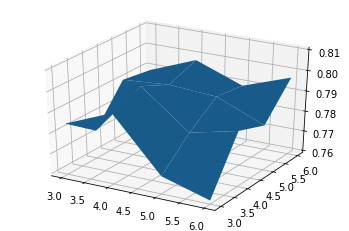

In [37]:
# Vizualise these using a 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare the data
px, py = np.meshgrid(np.arange(3,7), np.arange(3,7))
pz = np.array([[validation_scores[(i,j)] for i in range(3,7)] for j in range(3,7)])

# Customize the z-axis
ax.set_zlim(0.76, .81)

# Plot the surface
surf = ax.plot_surface(px, py, pz)
plt.show()

In [38]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

The highest validation score is: 0.7991
This corresponds to nodes (4, 4)


In [39]:
# Fit data with best parameter
clf = MLPClassifier(max_iter=2000, 
                    hidden_layer_sizes=optimal_hidden_layer_size, 
                    random_state=1)
clf.fit(X_train, y_train)
# Does not converge fully without changing max_iter

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [40]:
# Predict
y_pred = clf.predict(X_test)

# Accuracy 
accuracy_score(y_pred,y_test)

0.8163430420711975

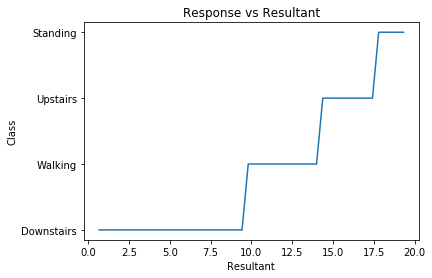

In [25]:
# Draw a response function to observe response vs resultant 

# Copy dataframe so as to not change original, and obtain medians
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.median()).transpose()

# View X_design_vec
X_design_vec.head()

# Find the min and max of the desired feature and set up a sequence
min_resultant = min(X.loc[:,"RESULTANT"])
max_resultant = max(X.loc[:,"RESULTANT"])
seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

# Set up a list of moving resultants
to_predict = []
for result in seq:
    X_design_vec.loc[0,"RESULTANT"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = clf.predict(to_predict)

# Plot 
plt.plot(seq,predictions)
plt.xlabel("Resultant")
plt.ylabel("Class")
plt.title("Response vs Resultant")
plt.show()

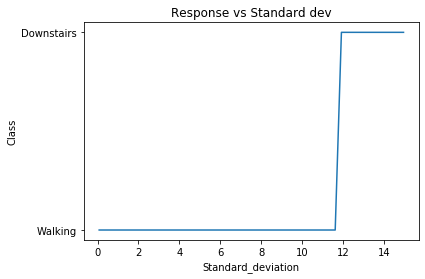

In [41]:
# Draw a response function to observe response vs resultant 

# Copy dataframe so as to not change original, and obtain medians
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.median()).transpose()

# View X_design_vec
X_design_vec.head()

# Find the min and max of the desired feature and set up a sequence
min_resultant = min(X.loc[:,"XSTANDDEV"])
max_resultant = max(X.loc[:,"XSTANDDEV"])
seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

# Set up a list of moving resultants
to_predict = []
for result in seq:
    X_design_vec.loc[0,"XSTANDDEV"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = clf.predict(to_predict)

# Plot 
plt.plot(seq,predictions)
plt.xlabel("Standard_deviation")
plt.ylabel("Class")
plt.title("Response vs Standard dev")
plt.show()


The `RESULTANT`, which is the average resultant acceleration, is plotted against selected classes. Does this make intuitive sense?

Continue to the small group discussion to discuss the outcomes of this model.